In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# To plot pretty figures
#%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_5"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "src_images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def get_path(fig_name, fig_extension="pdf"):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    return path


# Entanglement

In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_bloch_multivector, plot_state_qsphere,plot_state_city,plot_state_paulivec,plot_state_hinton
 

In [3]:


def createBellStates(inp1, inp2):
    qc = QuantumCircuit(2)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)

    qc.save_statevector()
    simulator = AerSimulator(method='statevector')
    qc = transpile(qc, simulator)


    result = simulator.run(qc).result()
    statevector = result.get_statevector(qc)

    return qc, statevector, result



Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.



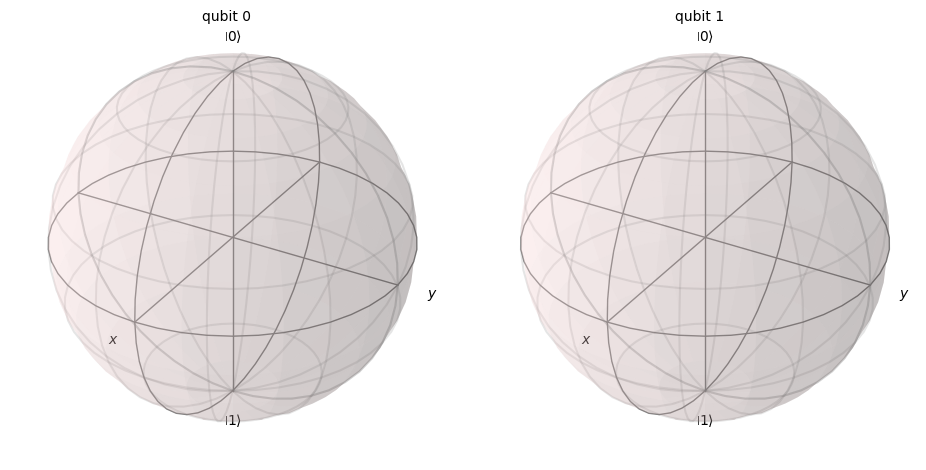

For inputs 0 0 Representation of Entangled States are:


░ ┌───┐      statevector 
q_0: ─|0>──░─┤ H ├──■────────░──────
           ░ └───┘┌─┴─┐      ░      
q_1: ─|0>──░──────┤ X ├──────░──────
           ░      └───┘      ░

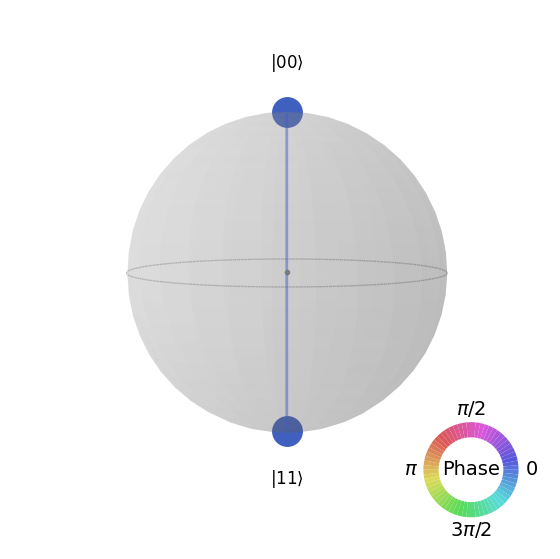

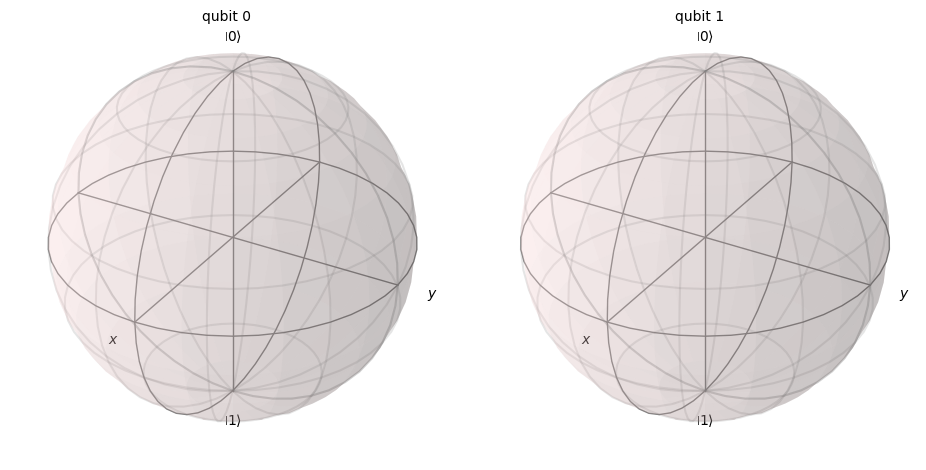

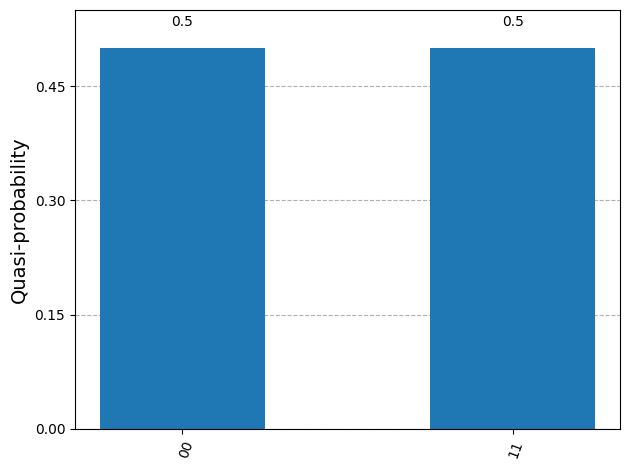

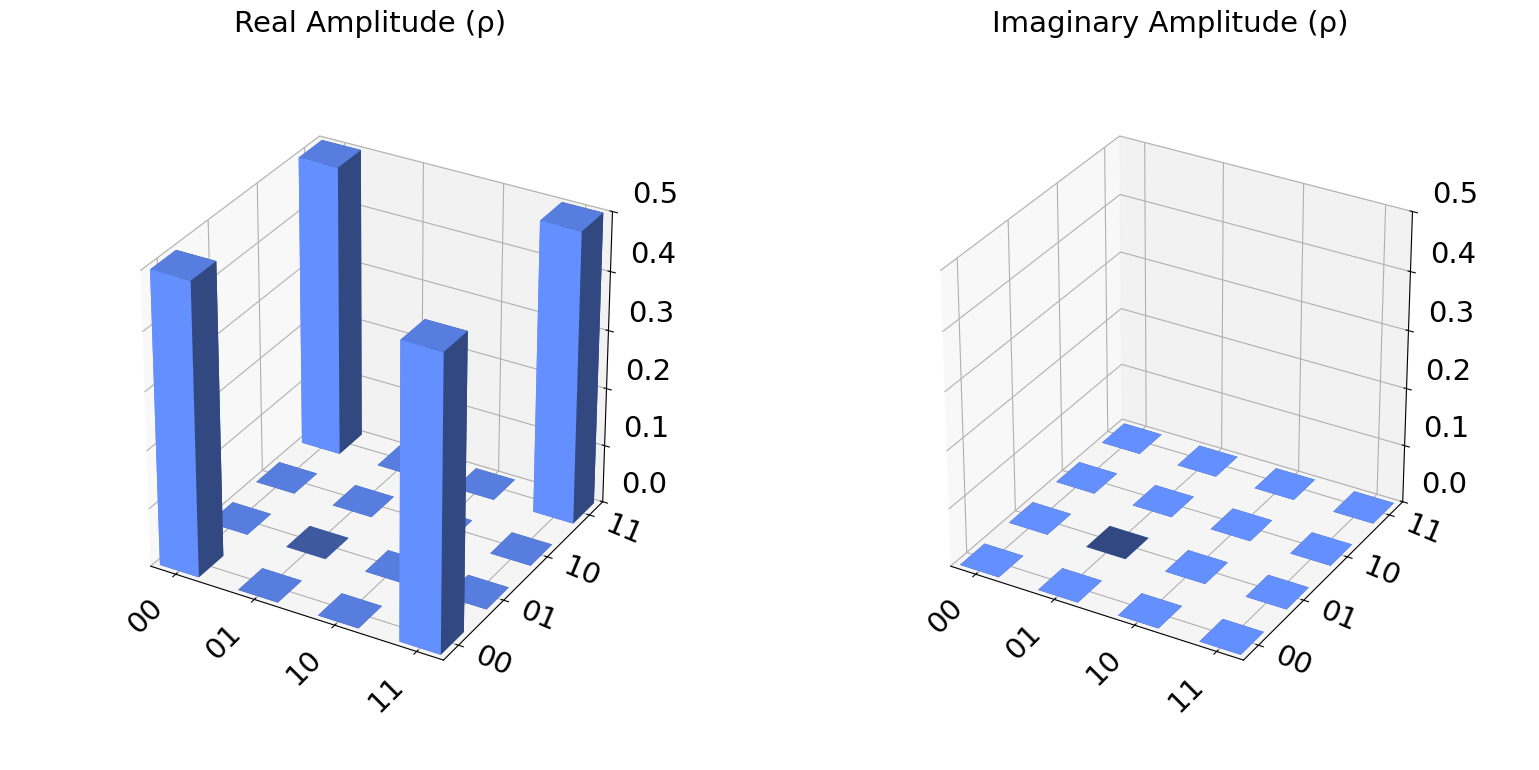

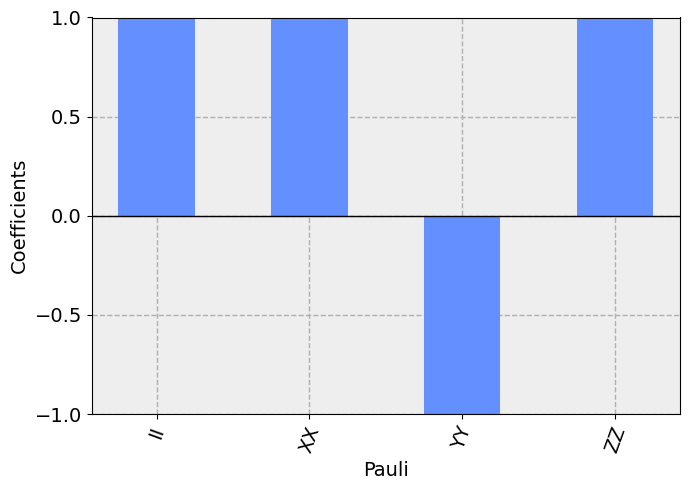

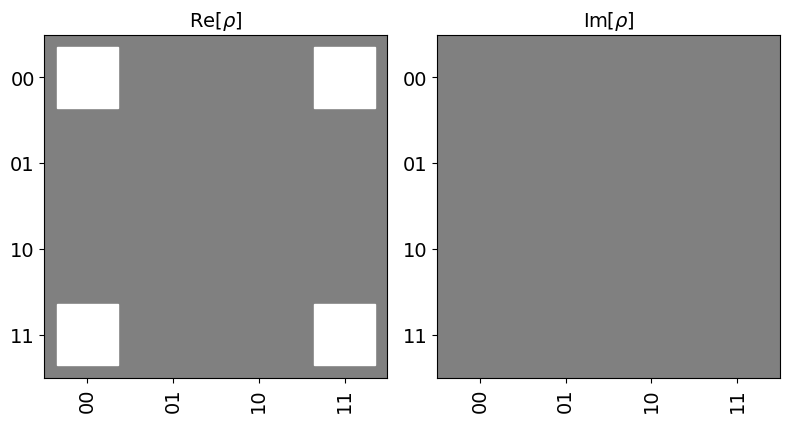



For inputs 0 1 Representation of Entangled States are:


┌───┐ ░ ┌───┐      statevector 
q_0: ─|0>─┤ X ├─░─┤ H ├──■────────░──────
          └───┘ ░ └───┘┌─┴─┐      ░      
q_1: ─|0>───────░──────┤ X ├──────░──────
                ░      └───┘      ░

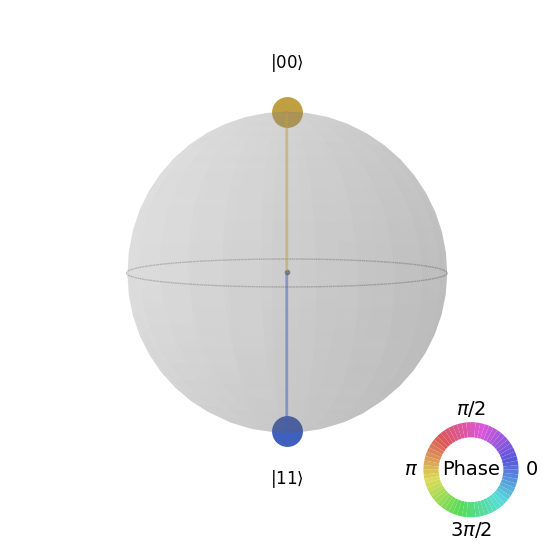

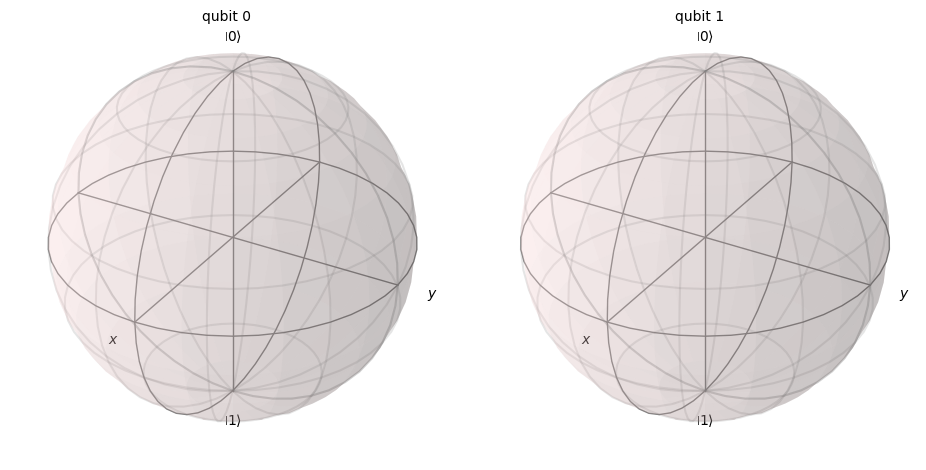

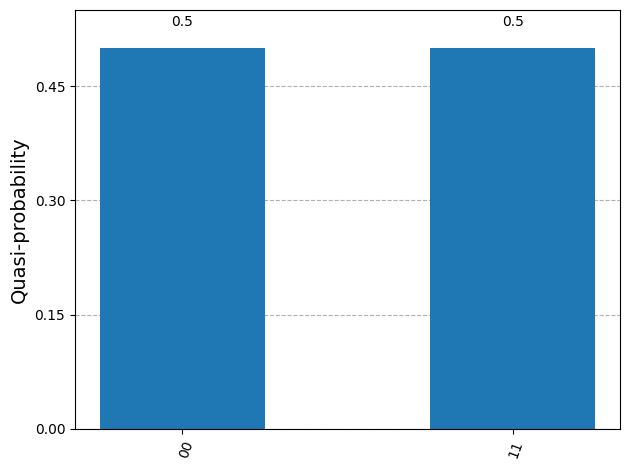

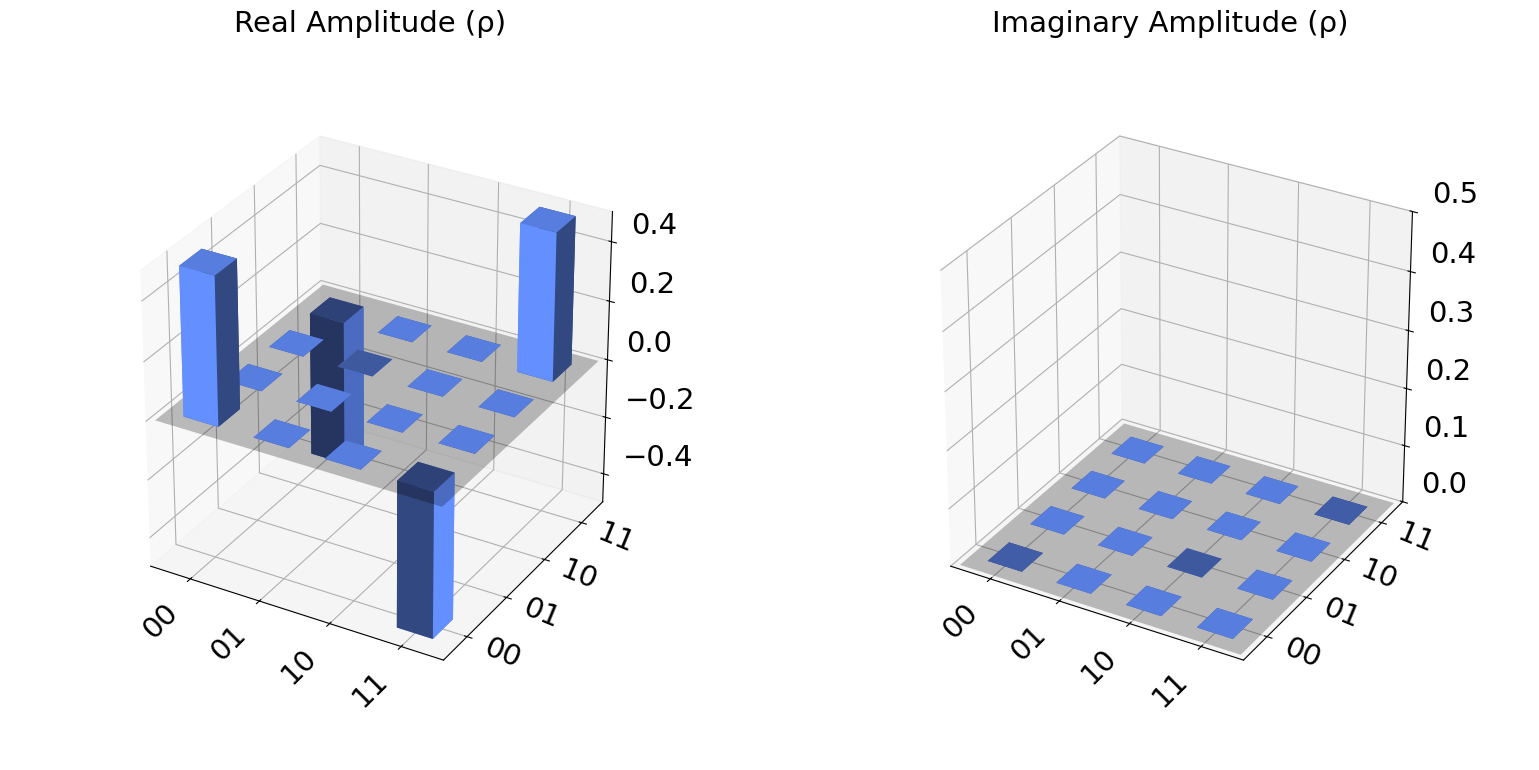

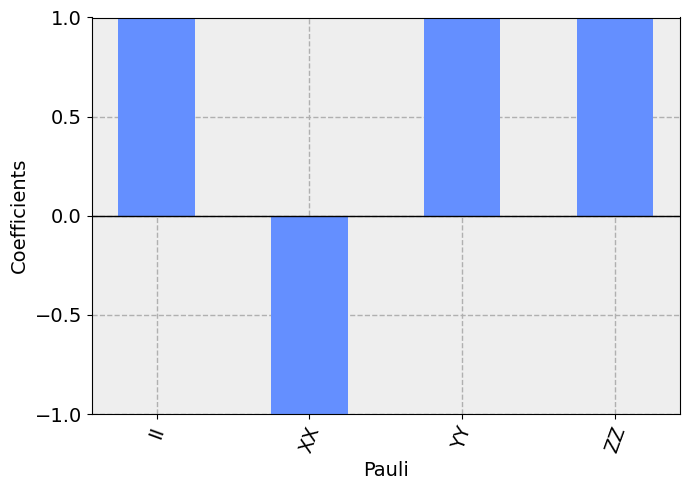

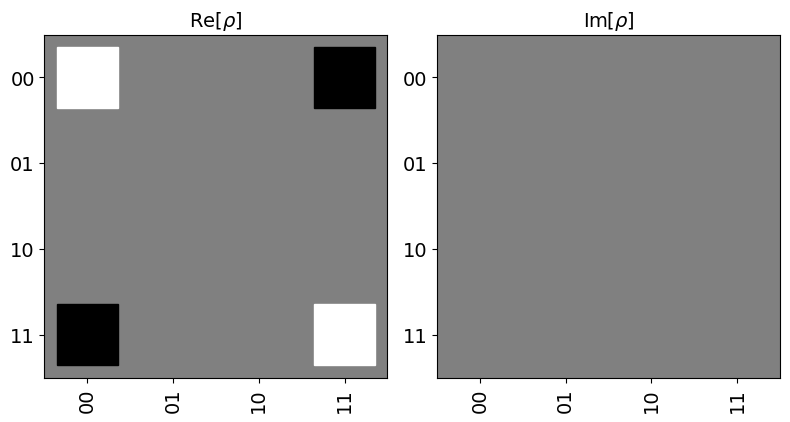



For inputs 1 0 Representation of Entangled States are:


░ ┌───┐      statevector 
q_0: ─|0>───────░─┤ H ├──■────────░──────
          ┌───┐ ░ └───┘┌─┴─┐      ░      
q_1: ─|0>─┤ X ├─░──────┤ X ├──────░──────
          └───┘ ░      └───┘      ░

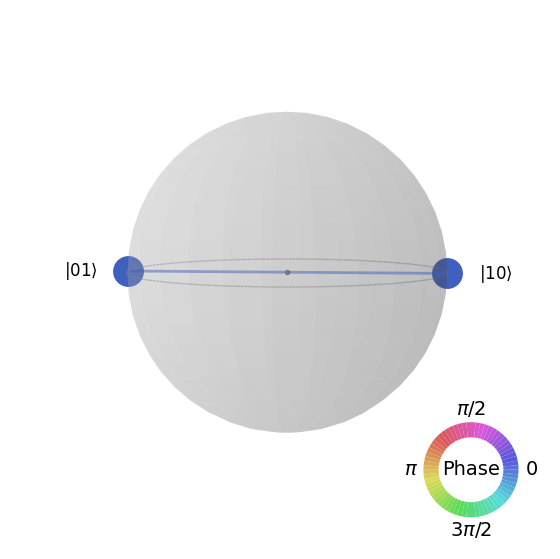

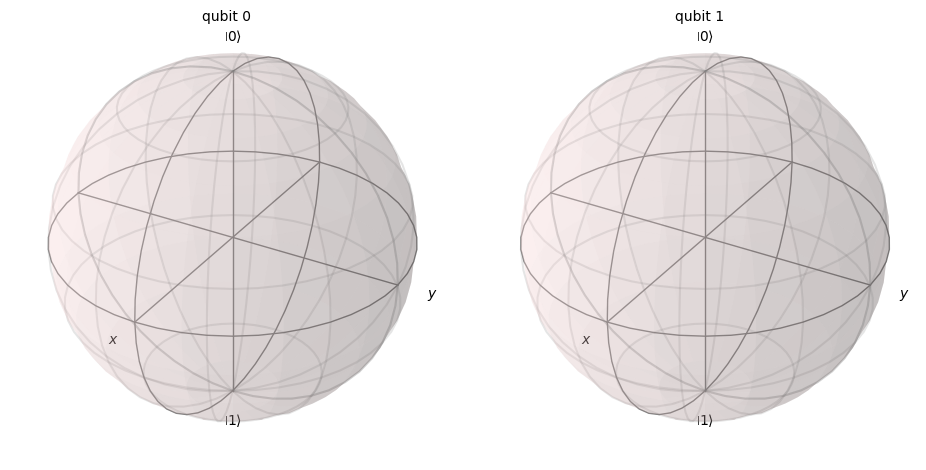

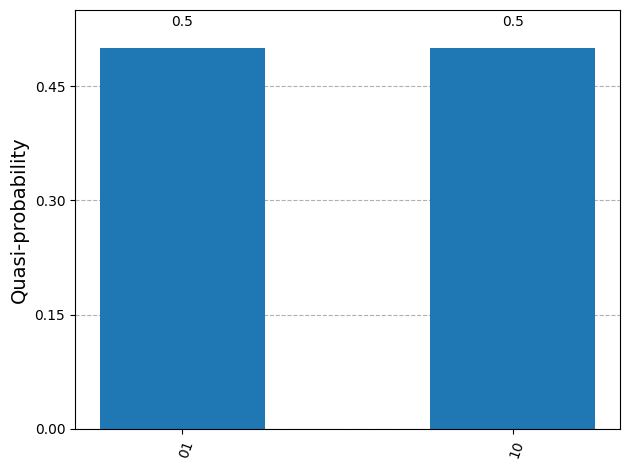

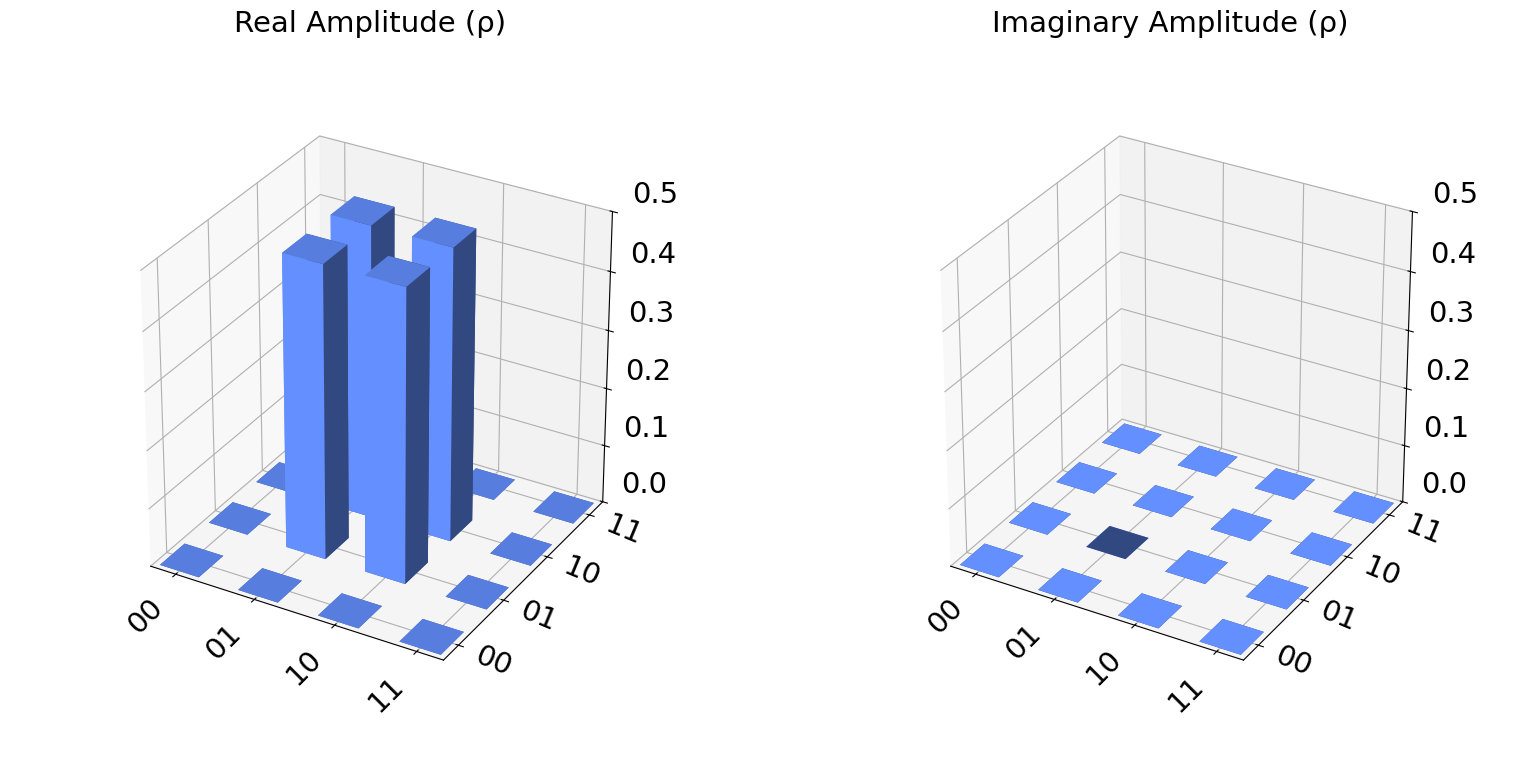

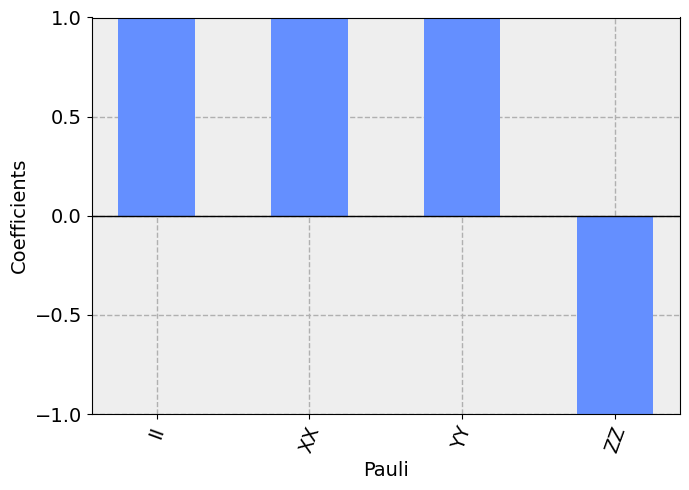

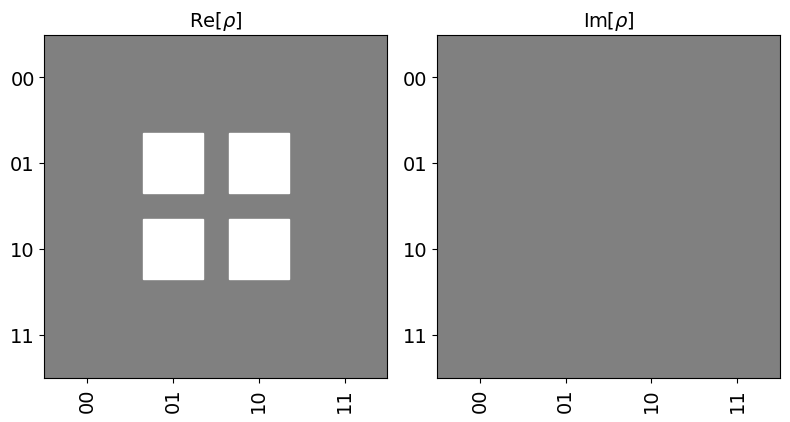



For inputs 1 1 Representation of Entangled States are:


┌───┐ ░ ┌───┐      statevector 
q_0: ─|0>─┤ X ├─░─┤ H ├──■────────░──────
          ├───┤ ░ └───┘┌─┴─┐      ░      
q_1: ─|0>─┤ X ├─░──────┤ X ├──────░──────
          └───┘ ░      └───┘      ░

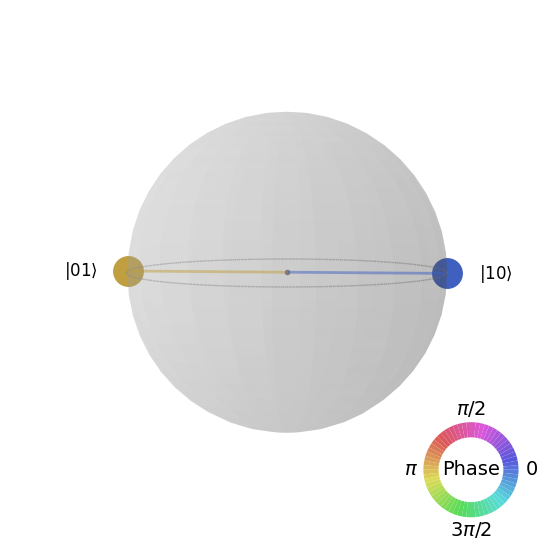

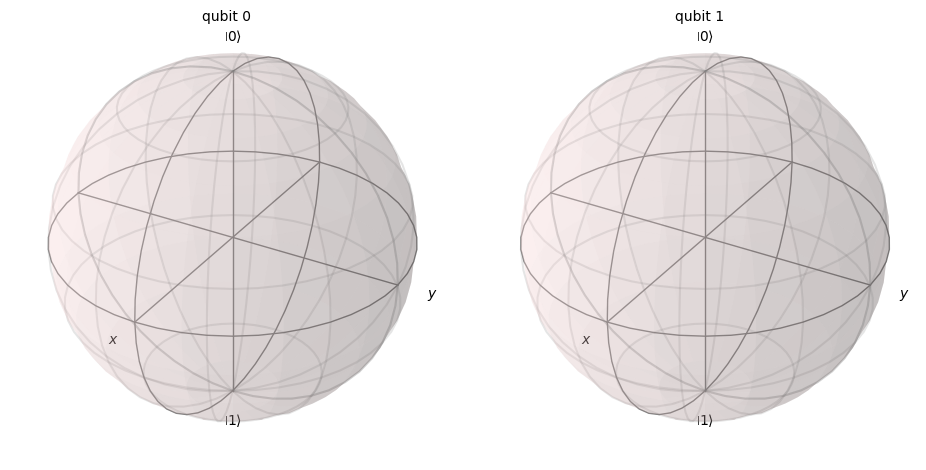

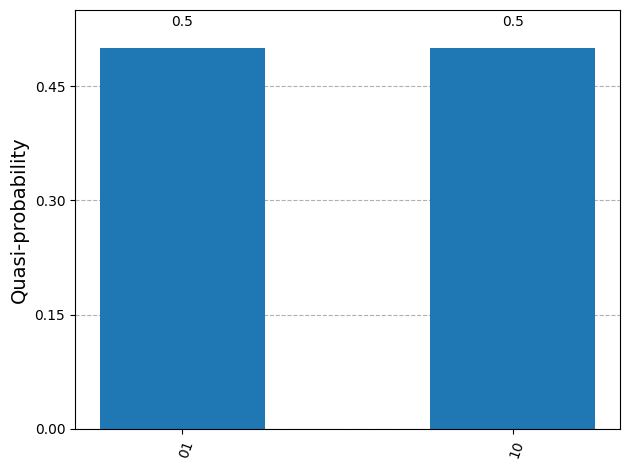

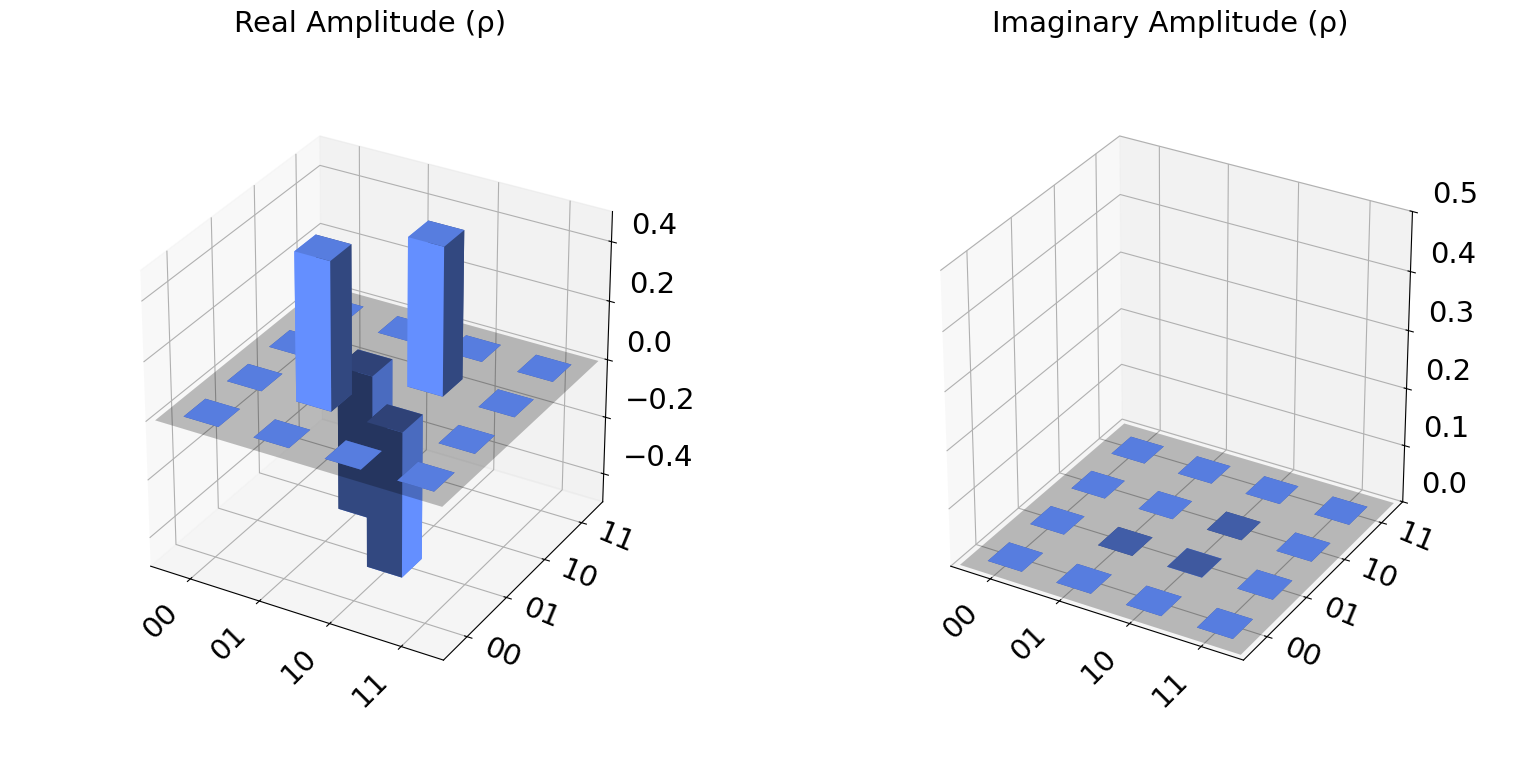

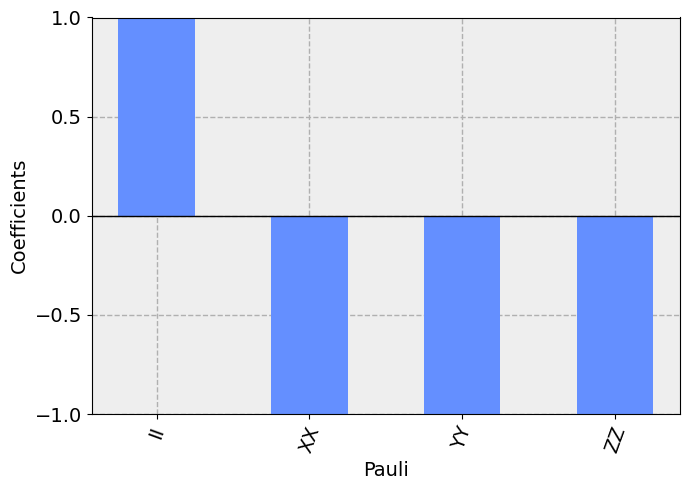

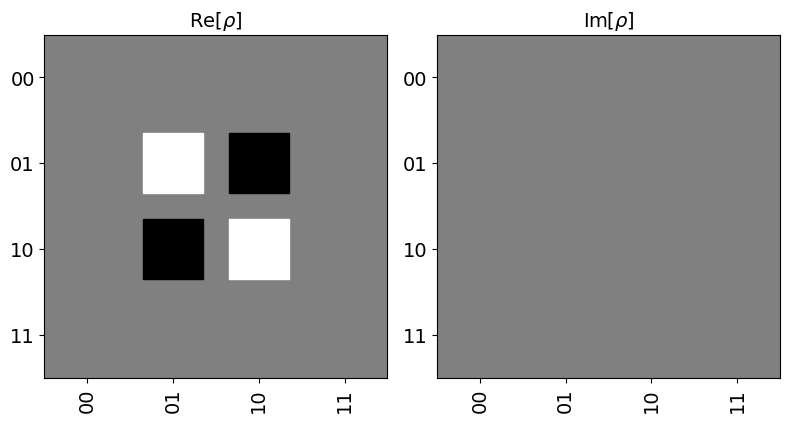

In [4]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')

inp1 = 0
inp2 = 1

qc, state, result = createBellStates(inp1, inp2)

display(plot_bloch_multivector(state))

# Uncomment below code in order to explore other states
for inp2 in ['0', '1']:
    for inp1 in ['0', '1']:
        qc, state, result = createBellStates(inp1, inp2)
        
        print('For inputs',inp2,inp1,'Representation of Entangled States are:')
        
        # Uncomment any of the below functions to visualize the resulting quantum states
        
        # Draw the quantum circuit
        display(qc.draw())

        # Plot states on QSphere
        display(plot_state_qsphere(state))

        # Plot states on Bloch Multivector
        display(plot_bloch_multivector(state))

        # Plot histogram
        display(plot_histogram(result.get_counts()))
        
        # Plot state matrix like a city
        display(plot_state_city(state))

        # Represent state matix using Pauli operators as the basis
        display(plot_state_paulivec(state))

        # Plot state matrix as Hinton representation
        display(plot_state_hinton(state))
        
        print('\n')

In [5]:
qc0 = QuantumCircuit(2)
qc0.cx(1,0)
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.h(1)
qc1.cx(0,1)
qc1.h(0)
qc1.h(1)

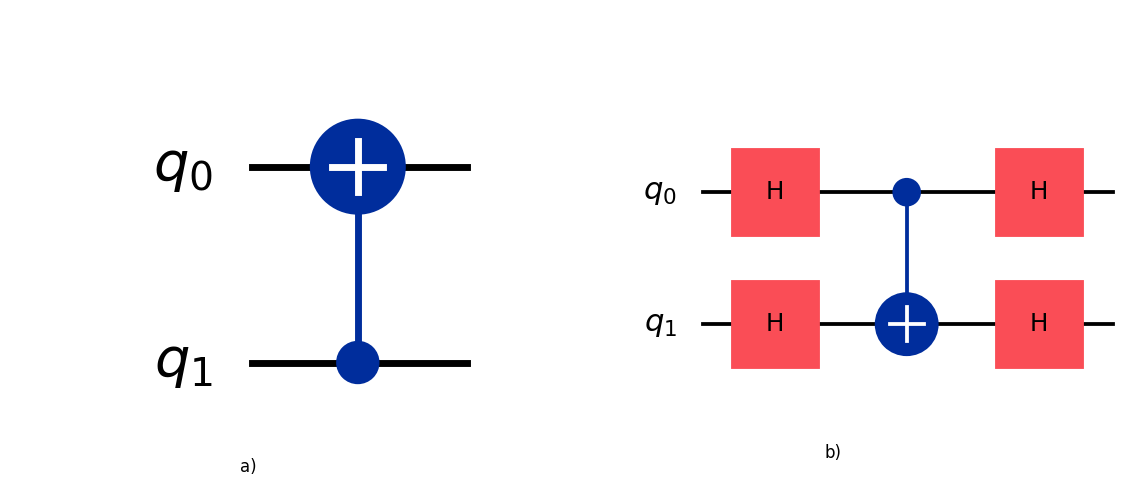

In [6]:
# Create a single figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Draw the circuit directly in subplot (a)
qc0.draw(output="mpl", ax=axes[0])
axes[0].set_title("a)", y=0.0)


qc1.draw(output="mpl", ax=axes[1])
axes[1].set_title("b)", y=-0.2)

plt.tight_layout()
plt.savefig(get_path("phase_kickback"), bbox_inches="tight", pad_inches=0)
plt.show()

## Phase Kickback

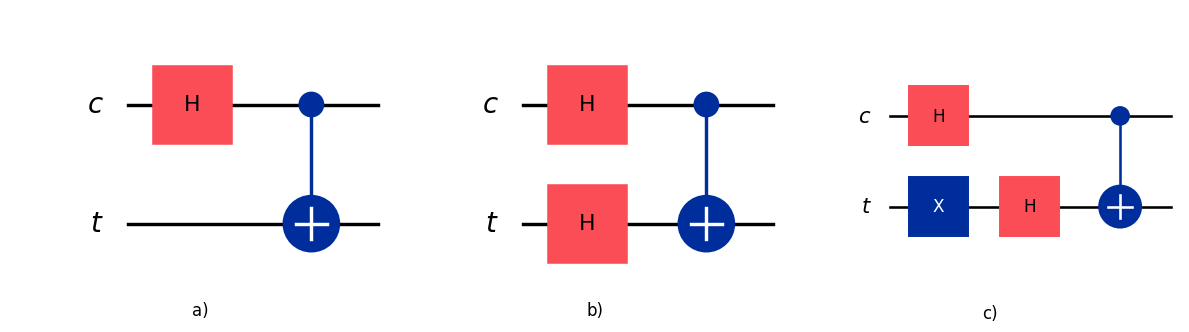

In [18]:
c = QuantumRegister(1, name='c')
t = QuantumRegister(1, name='t')
qc0 = QuantumCircuit(c,t)
qc0.h(c[0])
qc0.cx(c[0],t[0])

qc1 = QuantumCircuit(c,t)
qc1.h(c[0])
qc1.h(t[0])
qc1.cx(c[0],t[0])

qc2 = QuantumCircuit(c,t)
qc2.h(c[0])
qc2.x(t[0])
qc2.h(t[0])
qc2.cx(c[0],t[0])

# Create a single figure with 2 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Draw the circuit directly in subplot (a)
qc0.draw(output="mpl", ax=axes[0])
axes[0].set_title("a)", y=-0.1)


qc1.draw(output="mpl", ax=axes[1])
axes[1].set_title("b)", y=-0.1)

qc2.draw(output="mpl", ax=axes[2])
axes[2].set_title("c)", y=-0.3)

plt.tight_layout()
plt.savefig(get_path("phase_kickback"), bbox_inches="tight", pad_inches=0)
plt.show()


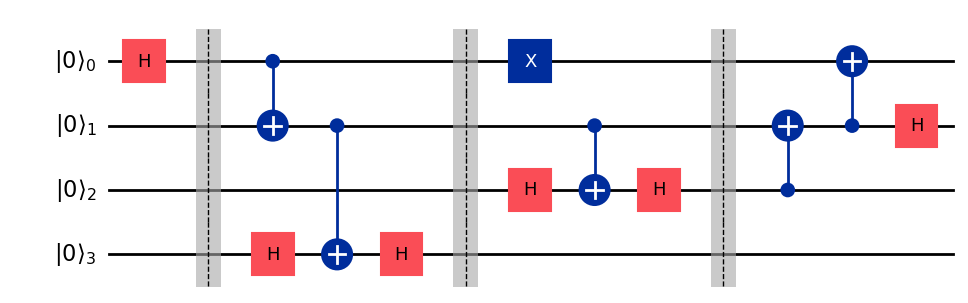

In [5]:

qreg = QuantumRegister(4, name='|0⟩')
qc = QuantumCircuit(qreg)

qc.h(qreg[0])
qc.barrier()
qc.cx(qreg[0],qreg[1])
qc.h(qreg[3])
qc.cx(qreg[1],qreg[3])
qc.h(qreg[3])
qc.barrier()
qc.x(qreg[0])
qc.h(qreg[2])
qc.cx(qreg[1],qreg[2])
qc.h(qreg[2])
qc.barrier()
qc.cx(qreg[2],qreg[1])
qc.cx(qreg[1],qreg[0])
qc.h(qreg[1])

fig = qc.draw(output="mpl")
fig.savefig(get_path("exercise_1"), bbox_inches="tight", pad_inches=0)
display(fig)